# **SatO2 analysis by colour range**

*In the following code the oxygen saturation analysis will be performed according to its range of grey levels.*

Oxygen saturation can be a key indicator of a person's respiratory health, so its measurement is important. A statistical analysis of oxygen saturation can provide valuable information about the distribution and variability of oxygen levels in healthy people as well as in people suffering from pathology. Such an analysis can also help to identify important patterns and trends.

  This work aims to monitor disease progression. This means that it can help monitor the progression of chronic respiratory diseases and identify changes in oxygen saturation that may be indicative of disease progression.

  Another important point is that it will improve the quality of medical care: Statistical analysis can help identify patterns of oxygen use and clinical practices.

Translated with DeepL.com (free version)

## **Objective**

To investigate the factors that influence oxygen saturation levels in the eye, seen in a numerical way, i.e. oxygen saturation will be studied in its grey scale and thus give a more detailed study in this area.

### **Specific Objetives**



*   Analyse the relationship between oxygen saturation levels in the eye and various eye diseases, such as glaucoma, age-related macular degeneration and diabetic retinopathy. This could help identify potential biomarkers or early indicators of these diseases.
*   To evaluate the efficacy of various therapeutic interventions aimed at increasing oxygen saturation levels in the eye, such as supplemental oxygen administration and hyperbaric oxygen therapy.



## **Data Description**

For the realisation of this work, different data vectors containing numerical information of healthy and diseased eyes were collected. The analysed files were divided into different tables (.xlsx format), the first table used in this code contains the numerical data vectors of fundus images, in which the optic nerve is on the right. 

It is worth mentioning that the table name follows the following nomenclature: HE_Data-ONR, where HE is the Healthy Eyes simplification and NOD is the Optic Nerve to the Right simplification.

In [1]:
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 18.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [2]:
# this will help in making the Python code more structured automatically (good coding practice)

# %load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from scipy.stats import norm

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [35]:
from google.colab import drive
drive.mount('/content/drive')
# read Data from excel
# Replace with the path to the excel to be analysed.
Data = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Datos_excel-(VC)/Datos_OS-NOD.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
Data.reset_index(inplace=True)
Data.index = Data.index + 1

In [37]:
Data.head()

index  OS-1  OS-2  OS-3  OS-4  OS-5  OS-6  OS-7  OS-8  OS-9  OS-10  OS-11  \
1      0   1.0     1   1.0   1.0   1.0   1.0   1.0   1.0   1.0    1.0    1.0   
2      1   1.0     1   1.0   1.0   1.0   1.0   1.0   1.0   1.0    1.0    1.0   
3      2   1.0     1   1.0   1.0   1.0   1.0   1.0   1.0   1.0    1.0    1.0   
4      3   1.0     1   1.0   1.0   1.0   1.0   1.0   1.0   1.0    1.0    1.0   
5      4   1.0     1   1.0   1.0   1.0   1.0   1.0   1.0   1.0    1.0    1.0   

   OS-12  OS-13  OS-14  OS-15  OS-16  OS-17  
1    1.0    1.0    1.0    1.0    1.0    1.0  
2    1.0    1.0    1.0    1.0    1.0    1.0  
3    1.0    1.0    1.0    1.0    1.0    1.0  
4    1.0    1.0    1.0    1.0    1.0    1.0  
5    1.0    1.0    1.0    1.0    1.0    1.0

In [38]:
Data.tail()

index  OS-1  OS-2  OS-3  OS-4  OS-5  OS-6  OS-7  OS-8  OS-9  OS-10  \
37582  37581   NaN   255   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
37583  37582   NaN   255   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
37584  37583   NaN   255   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
37585  37584   NaN   255   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
37586  37585   NaN   255   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   

       OS-11  OS-12  OS-13  OS-14  OS-15  OS-16  OS-17  
37582    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
37583    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
37584    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
37585    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
37586    NaN    NaN    NaN    NaN    NaN    NaN    NaN

In [39]:
Data.shape

(37586, 18)

In [40]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37586 entries, 1 to 37586
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   37586 non-null  int64  
 1   OS-1    36543 non-null  float64
 2   OS-2    37586 non-null  int64  
 3   OS-3    21275 non-null  float64
 4   OS-4    31809 non-null  float64
 5   OS-5    21654 non-null  float64
 6   OS-6    26575 non-null  float64
 7   OS-7    28100 non-null  float64
 8   OS-8    34081 non-null  float64
 9   OS-9    19564 non-null  float64
 10  OS-10   30357 non-null  float64
 11  OS-11   21651 non-null  float64
 12  OS-12   30474 non-null  float64
 13  OS-13   22031 non-null  float64
 14  OS-14   25792 non-null  float64
 15  OS-15   18998 non-null  float64
 16  OS-16   24346 non-null  float64
 17  OS-17   21661 non-null  float64
dtypes: float64(16), int64(2)
memory usage: 5.2 MB


In [ ]:
# Fixing the data types

In [41]:
cols = Data.select_dtypes(['int64'])
cols.columns

Index(['index', 'OS-2'], dtype='object')

In [ ]:
# Summary of the dataset.

In [42]:
Data.describe().T

count          mean           std  min      25%      50%       75%  \
index  37586.0  18792.500000  10850.287945  0.0  9396.25  18792.5  28188.75   
OS-1   36543.0    150.126892     51.934766  1.0   113.00    146.0    191.00   
OS-2   37586.0    135.248231     53.989496  1.0   100.00    129.0    172.00   
OS-3   21275.0    152.736592     54.806859  1.0   119.00    157.0    195.00   
OS-4   31809.0    134.190984     57.721656  1.0    93.00    125.0    178.00   
OS-5   21654.0    144.360257     56.901617  1.0   109.00    144.0    188.00   
OS-6   26575.0    165.100659     49.680947  1.0   143.00    173.0    200.00   
OS-7   28100.0    165.434840     52.233829  1.0   141.00    175.0    204.00   
OS-8   34081.0    161.835891     53.706069  1.0   137.00    171.0    200.00   
OS-9   19564.0    155.848139     54.951050  1.0   122.00    157.0    204.00   
OS-10  30357.0    160.083342     51.688539  1.0   135.00    167.0    197.00   
OS-11  21651.0    150.826428     53.310692  1.0   118.00    153.0    190.00   
OS-12  30474.0    157.303570     51.681408  1.0   126.00    159.0    198.00   
OS-13  22031.0    137.970587     60.596649  1.0    95.00    131.0    188.00   
OS-14  25792.0    152.368758     57.577393  1.0   119.00    158.0    198.00   
OS-15  18998.0    194.561638     47.631293  1.0   183.00    213.0    225.00   
OS-16  24346.0    160.757496     58.970689  1.0   134.00    175.0    205.00   
OS-17  21661.0    145.652694     56.209717  1.0   109.00    143.0    191.00   

           max  
index  37585.0  
OS-1     255.0  
OS-2     255.0  
OS-3     255.0  
OS-4     255.0  
OS-5     255.0  
OS-6     255.0  
OS-7     255.0  
OS-8     255.0  
OS-9     255.0  
OS-10    255.0  
OS-11    255.0  
OS-12    255.0  
OS-13    255.0  
OS-14    255.0  
OS-15    255.0  
OS-16    255.0  
OS-17    255.0

In [ ]:
# EDA
### Univariate analysis

In [43]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [44]:
Data_filtrada = Data[Data != 0]

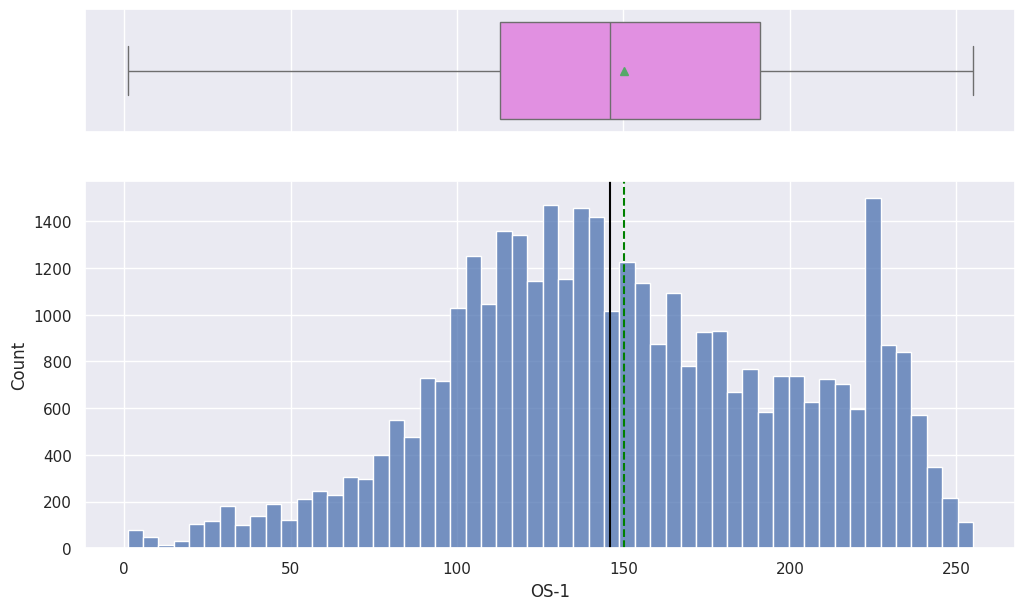

In [45]:
histogram_boxplot(Data_filtrada, 'OS-1')

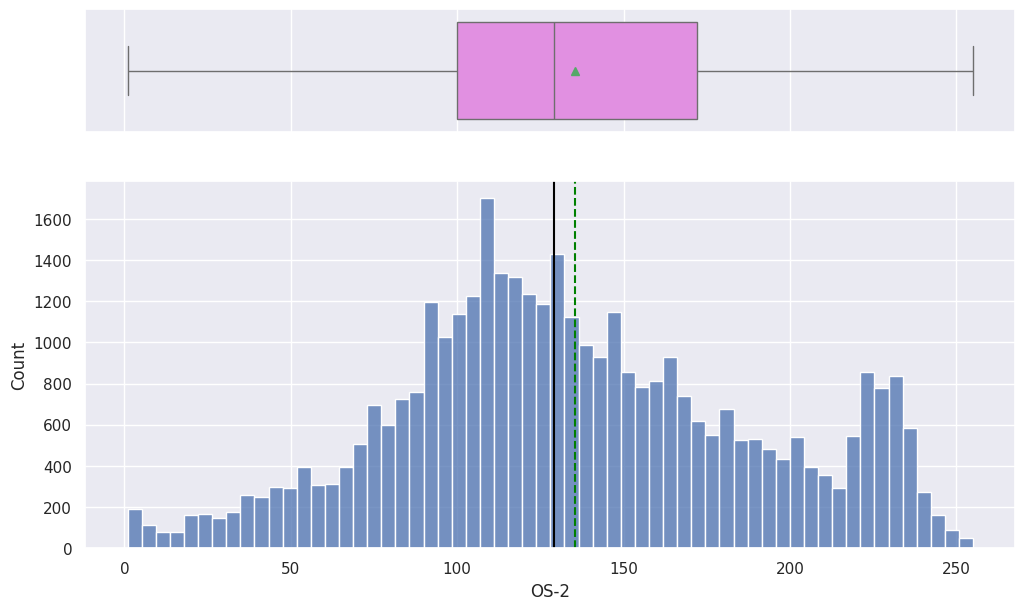

In [46]:
histogram_boxplot(Data_filtrada,'OS-2')

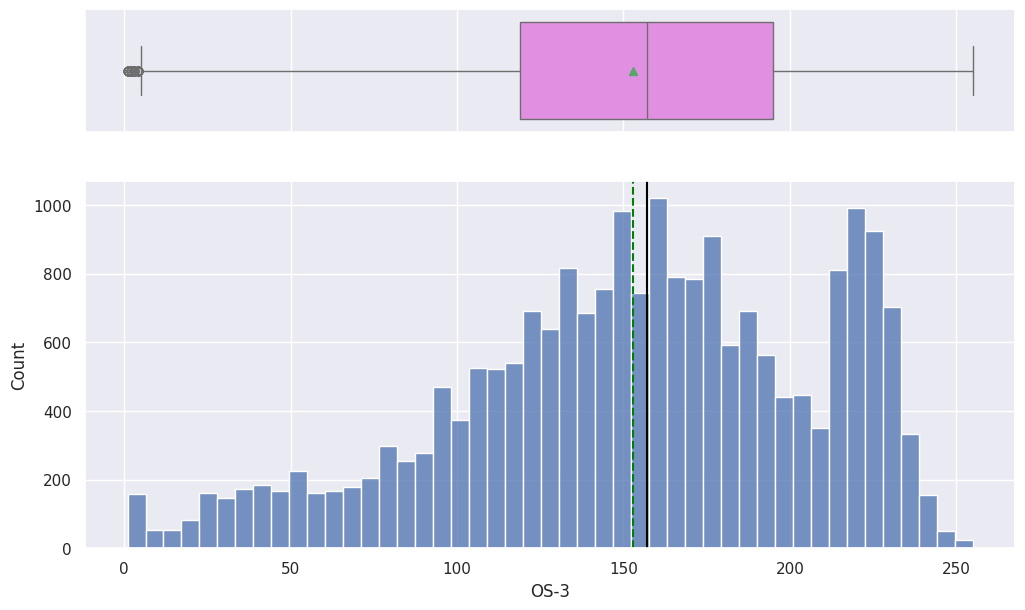

In [47]:
histogram_boxplot(Data_filtrada, 'OS-3')

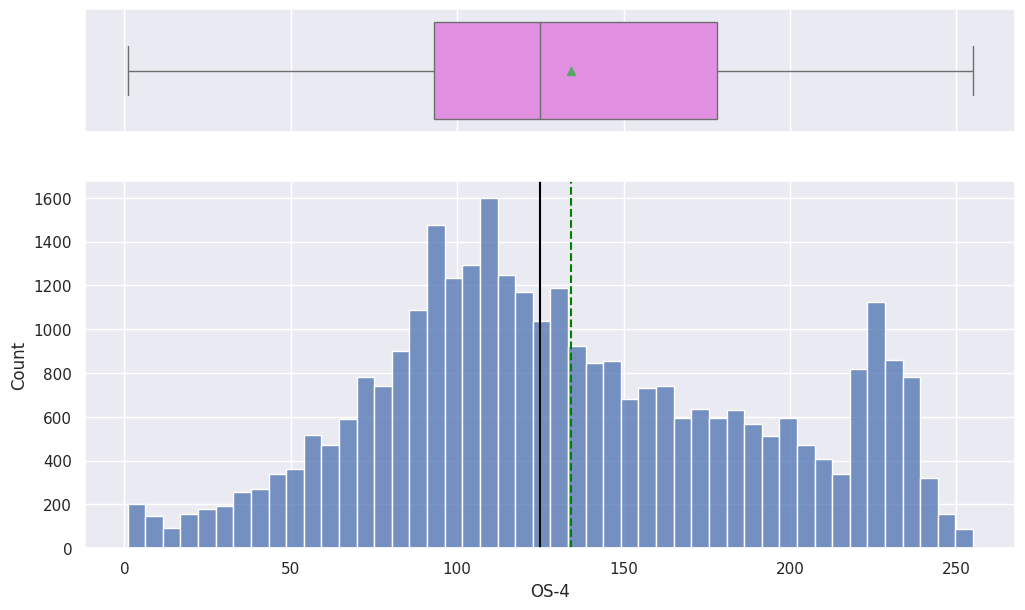

In [48]:
histogram_boxplot(Data_filtrada, 'OS-4')

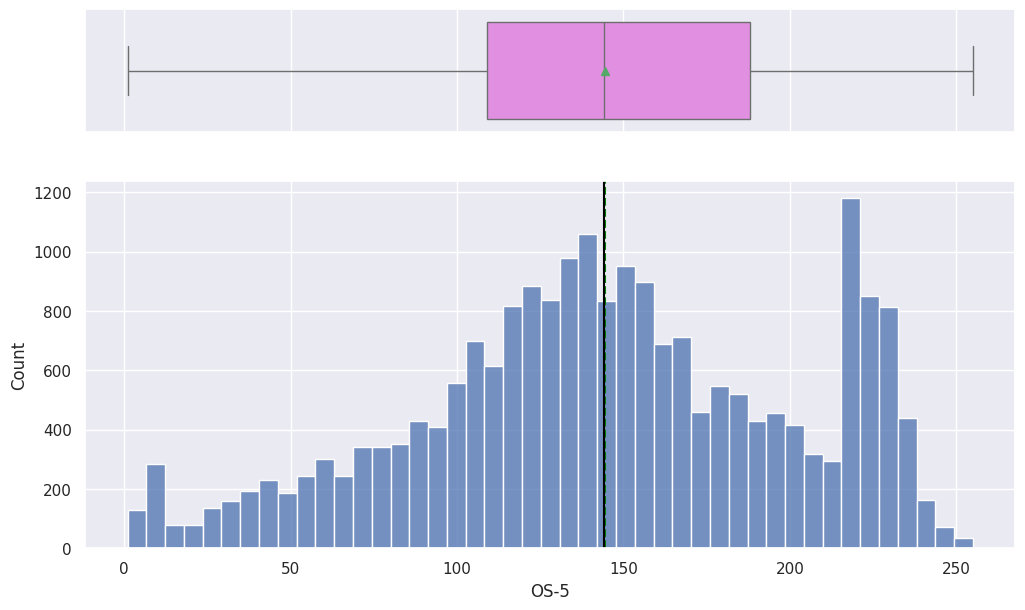

In [49]:
histogram_boxplot(Data_filtrada, 'OS-5')

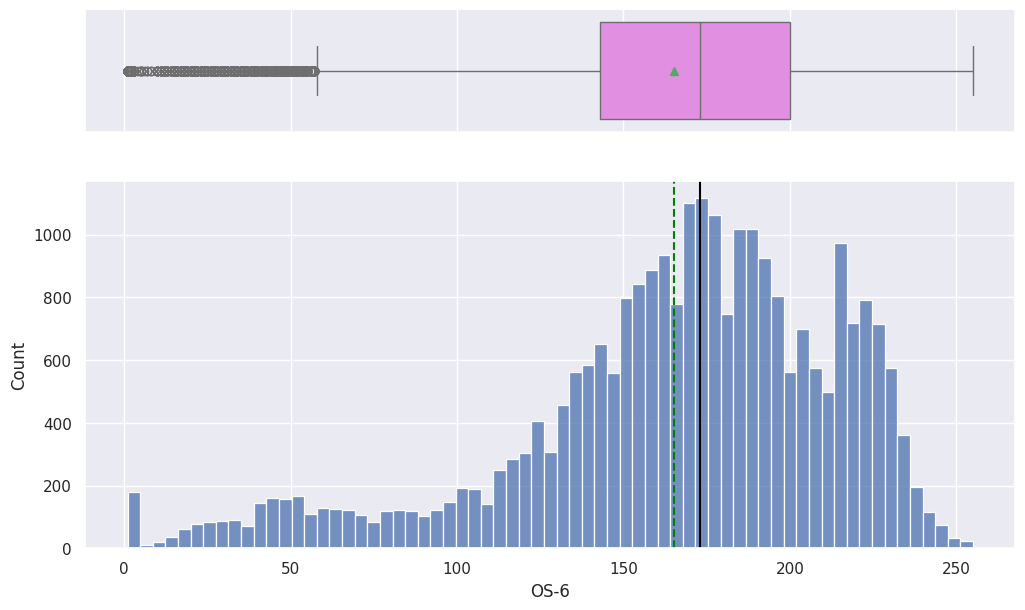

In [50]:
histogram_boxplot(Data_filtrada, 'OS-6')

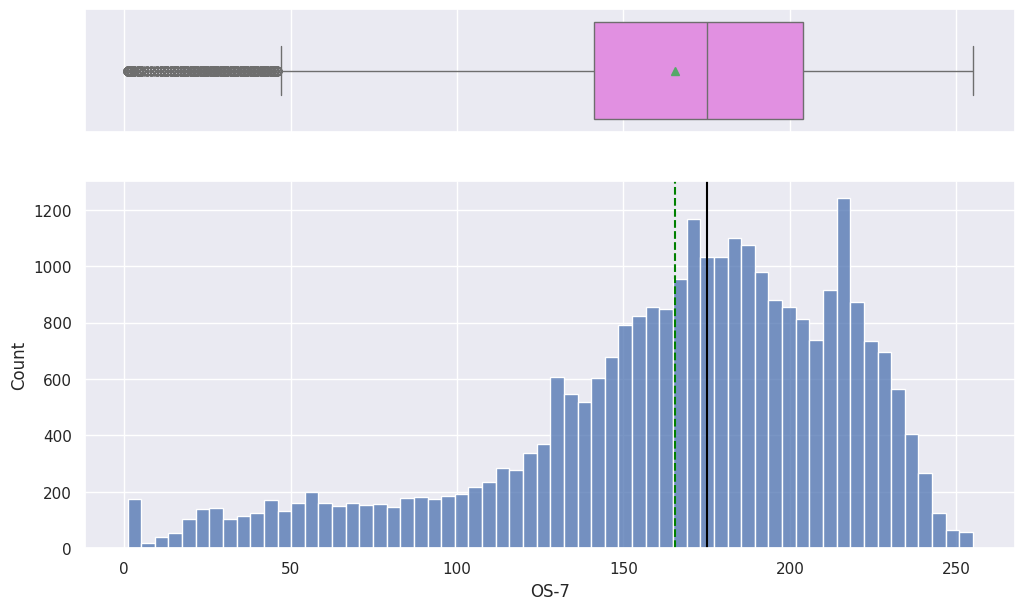

In [51]:
histogram_boxplot(Data_filtrada, 'OS-7')

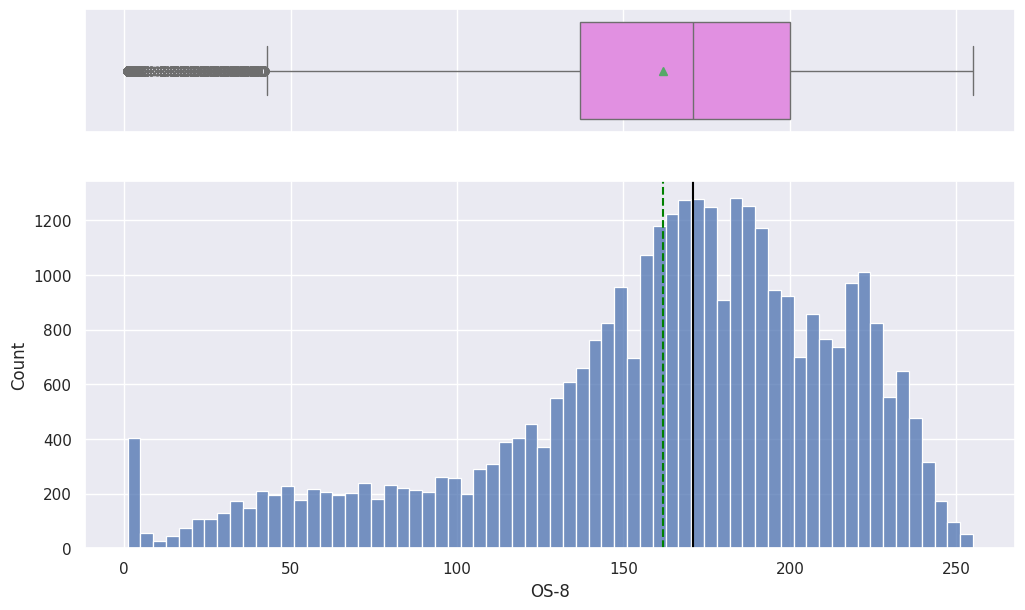

In [52]:
histogram_boxplot(Data_filtrada, 'OS-8')

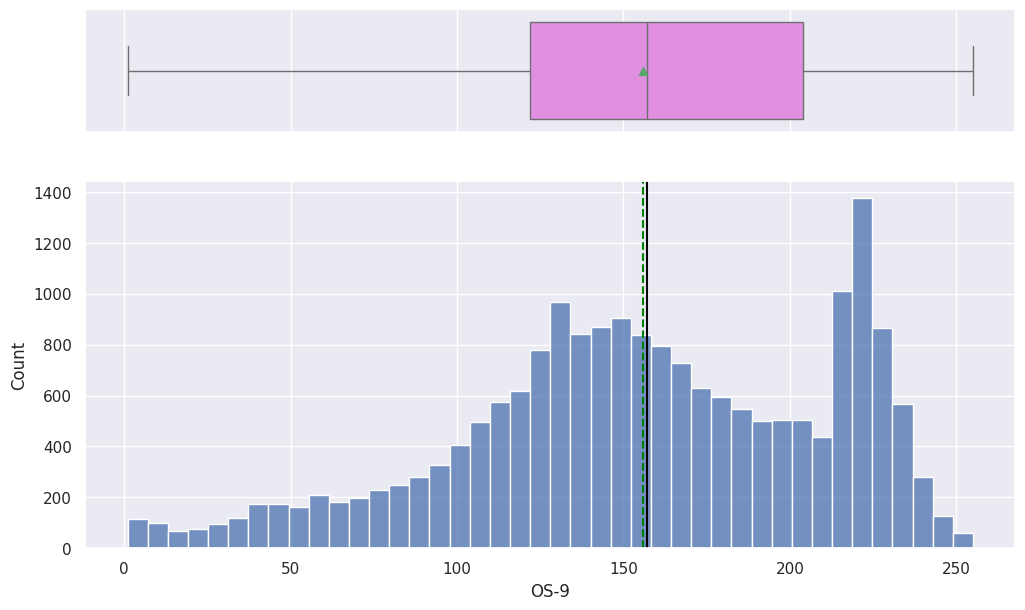

In [53]:
histogram_boxplot(Data_filtrada, 'OS-9')

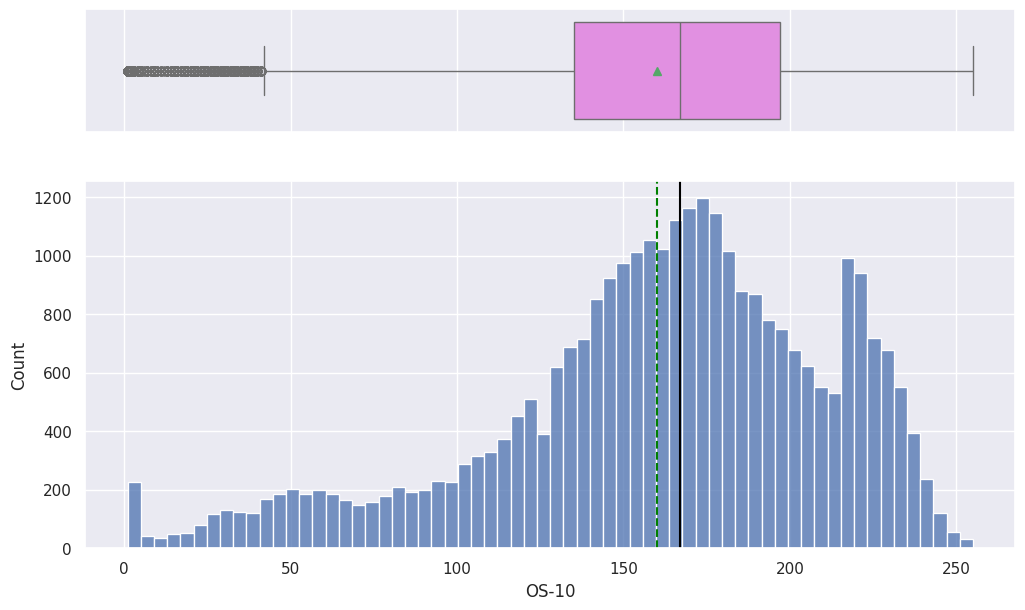

In [54]:
histogram_boxplot(Data_filtrada, 'OS-10')

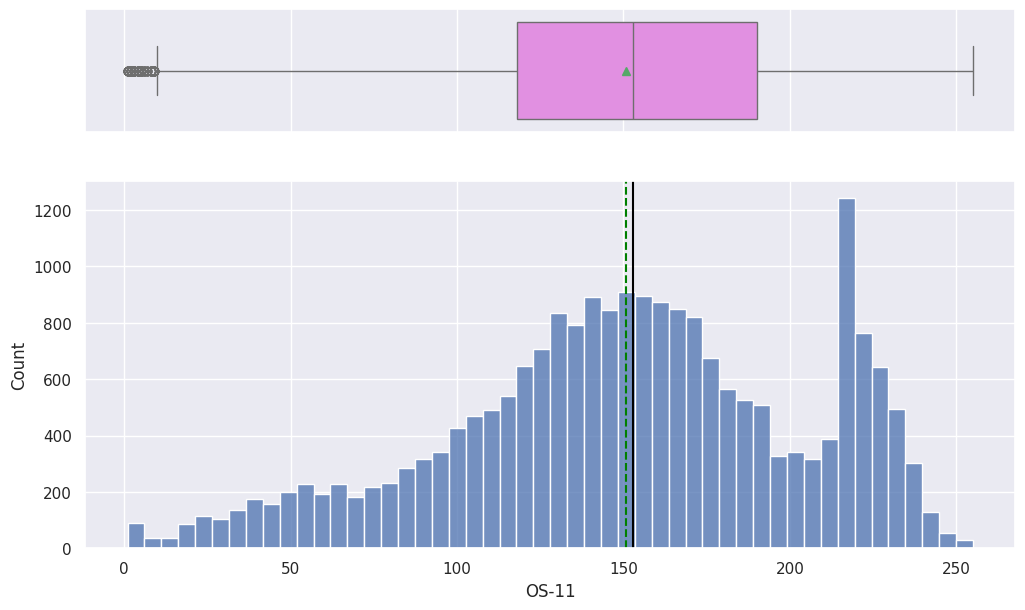

In [55]:
histogram_boxplot(Data_filtrada, 'OS-11')

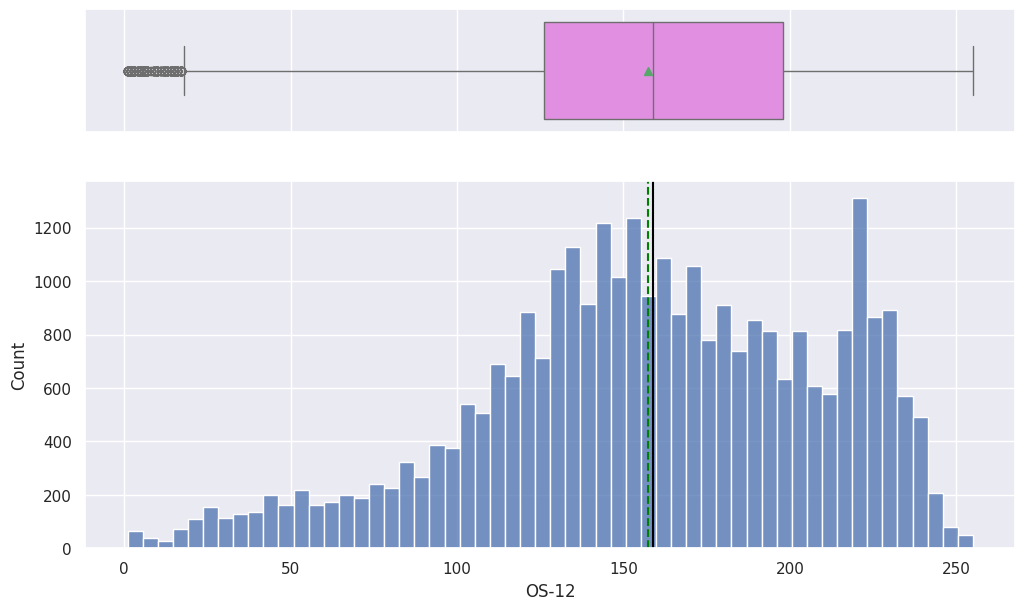

In [56]:
histogram_boxplot(Data_filtrada, 'OS-12')

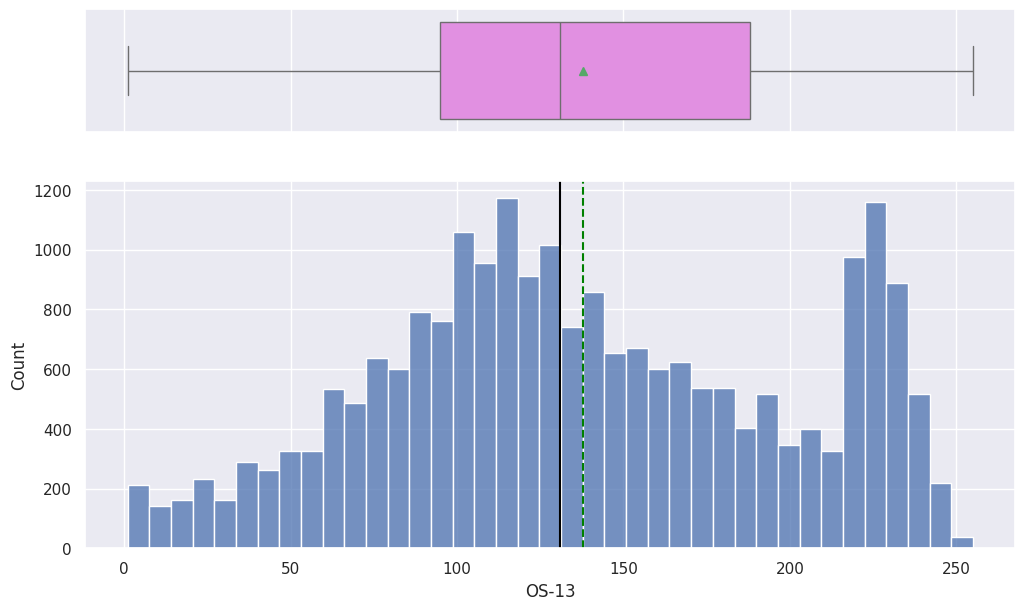

In [57]:
histogram_boxplot(Data_filtrada, 'OS-13')

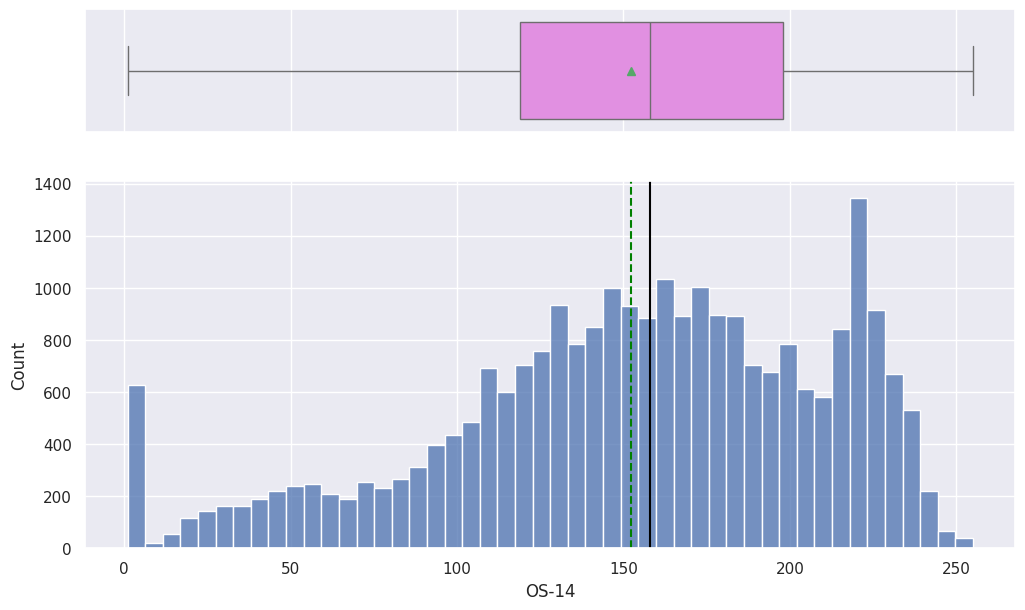

In [58]:
histogram_boxplot(Data_filtrada, 'OS-14')

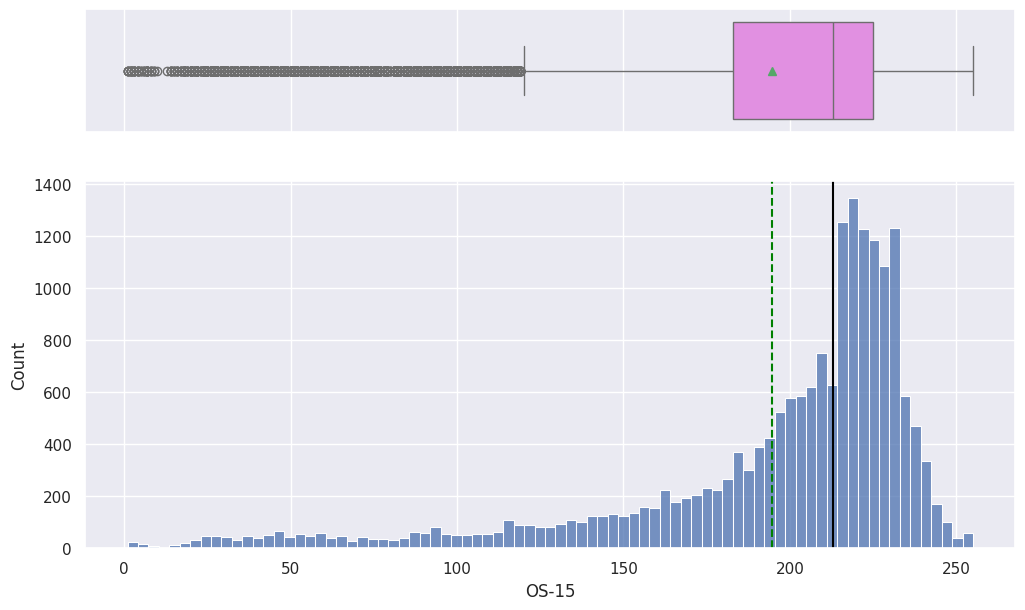

In [59]:
histogram_boxplot(Data_filtrada, 'OS-15')

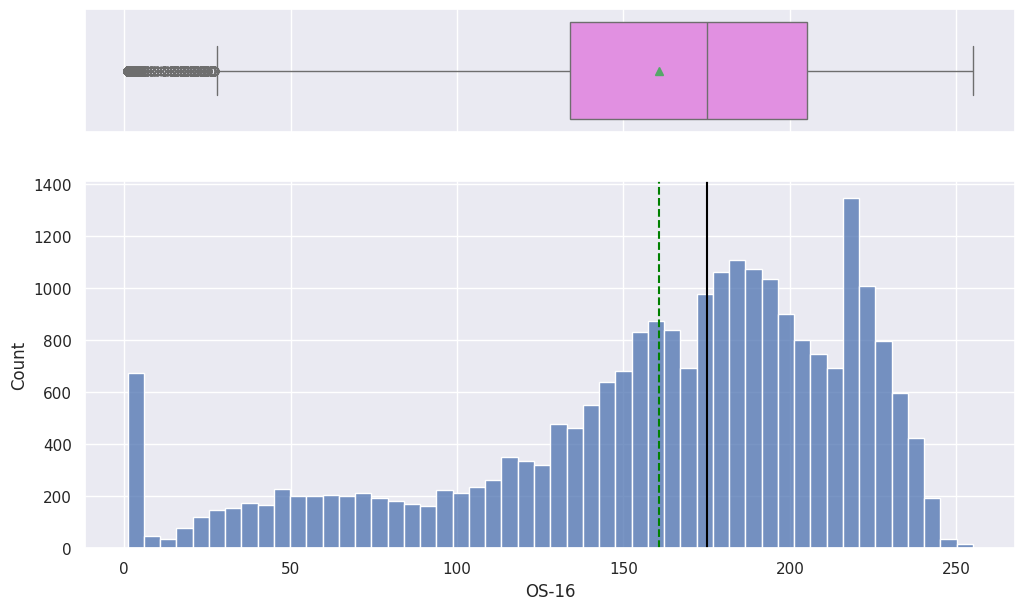

In [60]:
histogram_boxplot(Data_filtrada, 'OS-16')

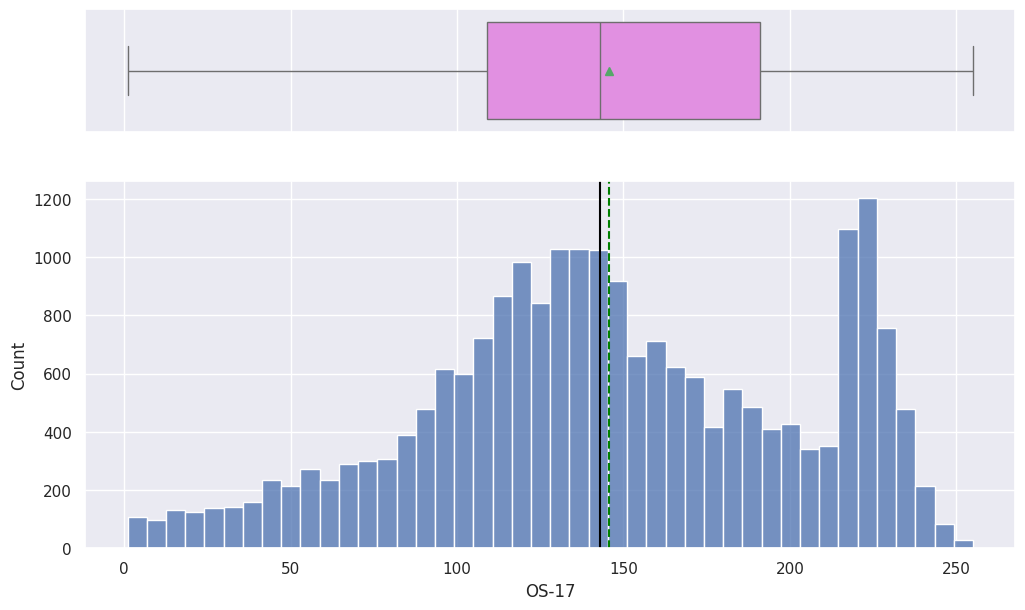

In [61]:
histogram_boxplot(Data_filtrada, 'OS-17')

In [62]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.rcParams["figure.figsize"] =(5,25)
    plt.show()  # show the plot

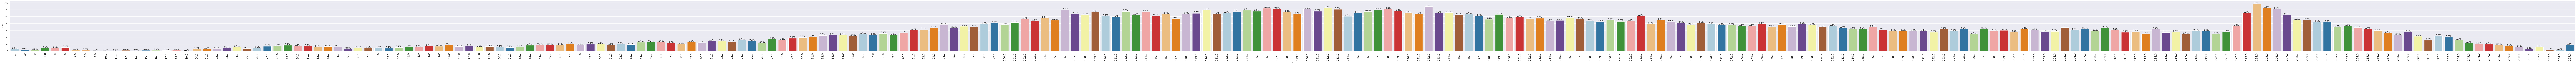

In [63]:
labeled_barplot(Data_filtrada, "OS-1", perc=True)

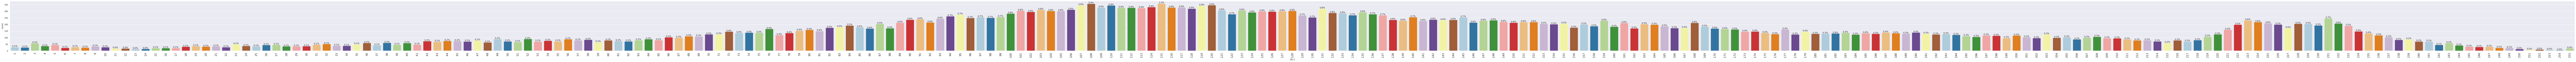

In [64]:
labeled_barplot(Data_filtrada, "OS-2", perc=True)

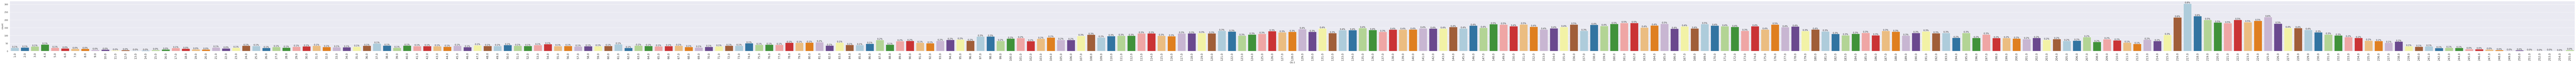

In [65]:
labeled_barplot(Data_filtrada, "OS-3", perc=True)

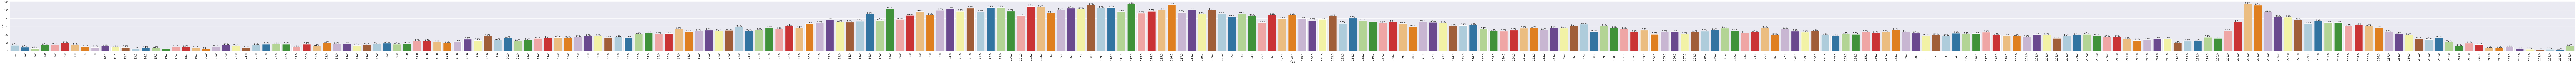

In [66]:
labeled_barplot(Data_filtrada, "OS-4", perc=True)

<Axes: >

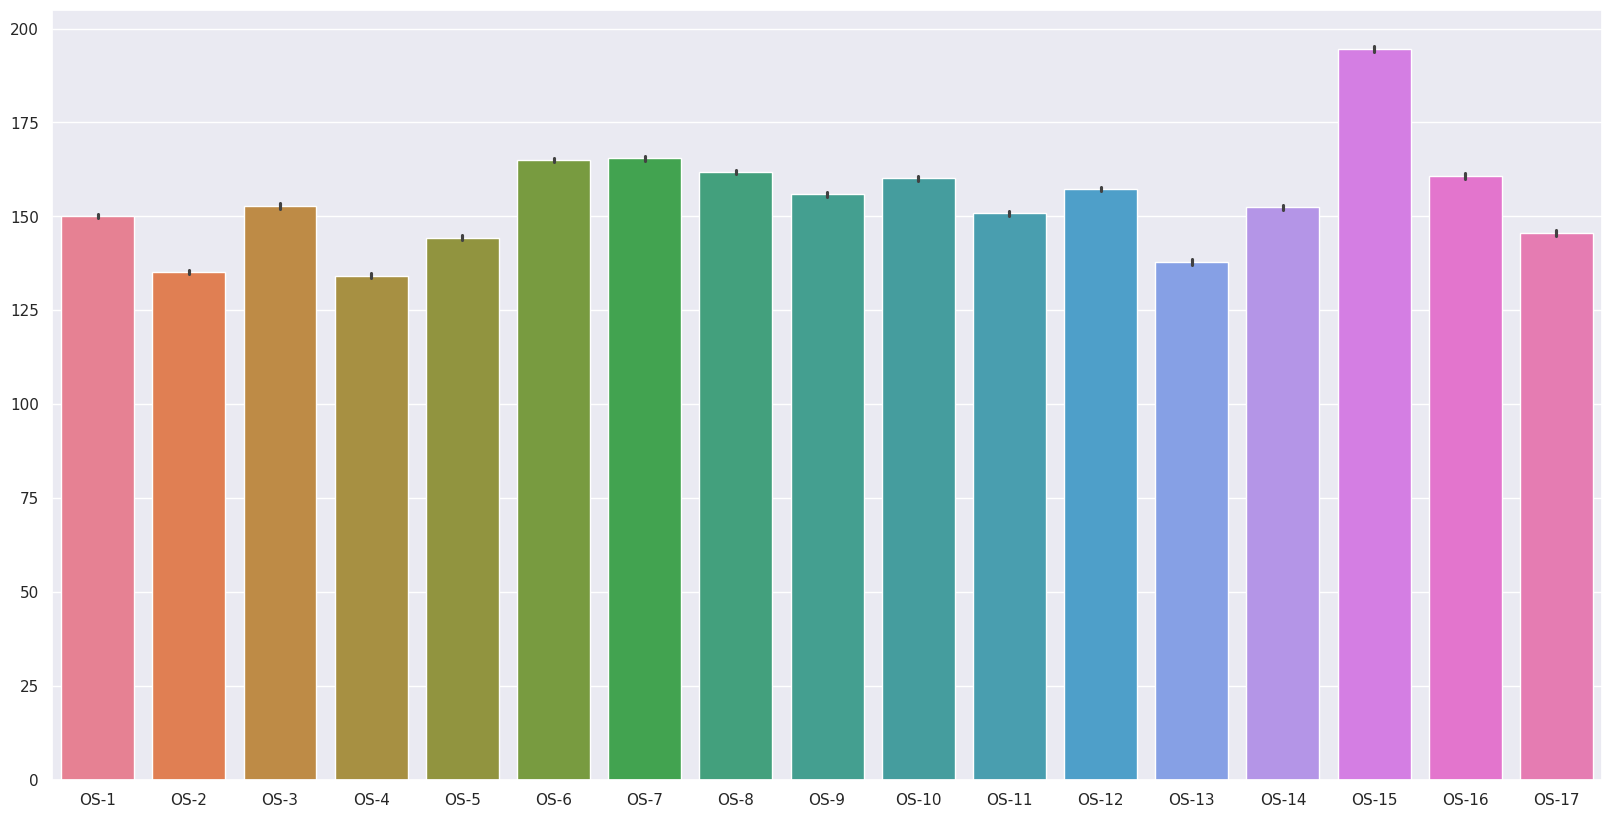

In [67]:
plt.figure(figsize=(20,10))
data_sin_indice = Data_filtrada.drop(columns=['index'])
sns.barplot(data=data_sin_indice)



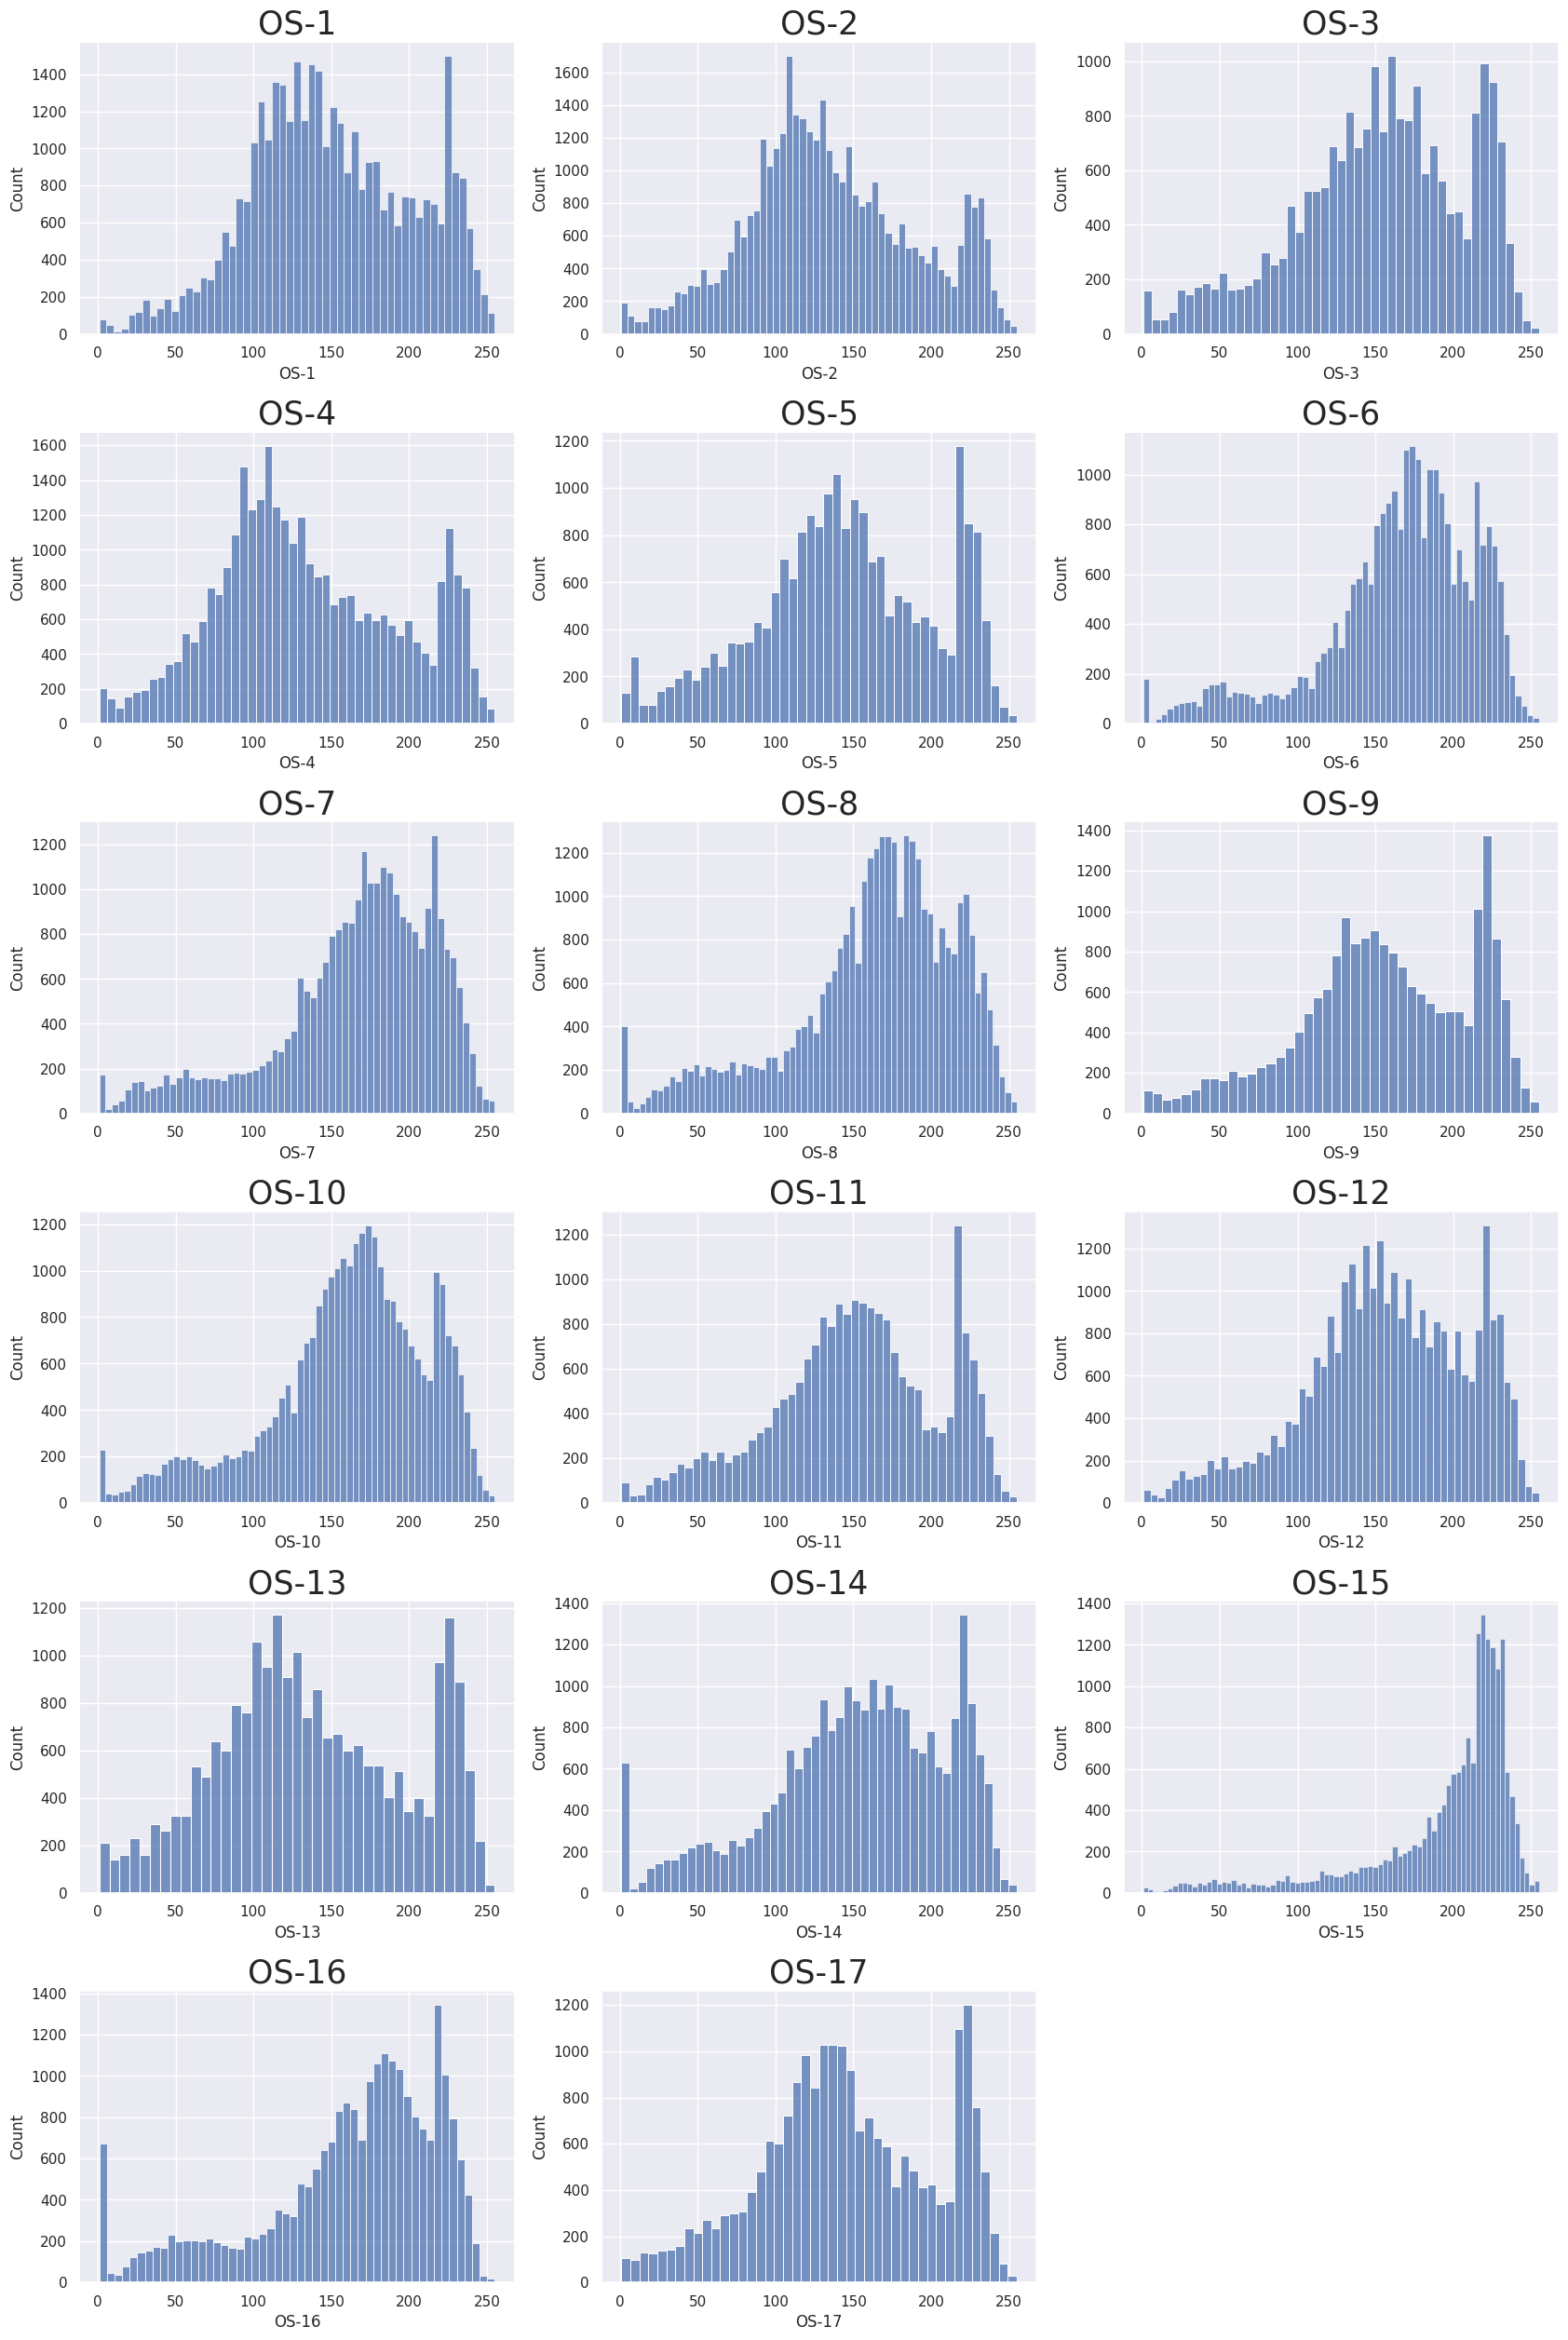

In [68]:
#Performing Univariate Analysis to study the central tendency and dispersion
#Plotting histogram to study distribution
Uni_num = data_sin_indice.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))
for i in range(len(Uni_num)):     #creating a loop that will show the plots for the columns in one plot
    plt.subplot(18,3,i+1)
    sns.histplot(data_sin_indice[Uni_num[i]],kde=False)
    plt.tight_layout()
    plt.title(Uni_num[i],fontsize=25)

plt.show()

In [ ]:
# Bivariate Analysis

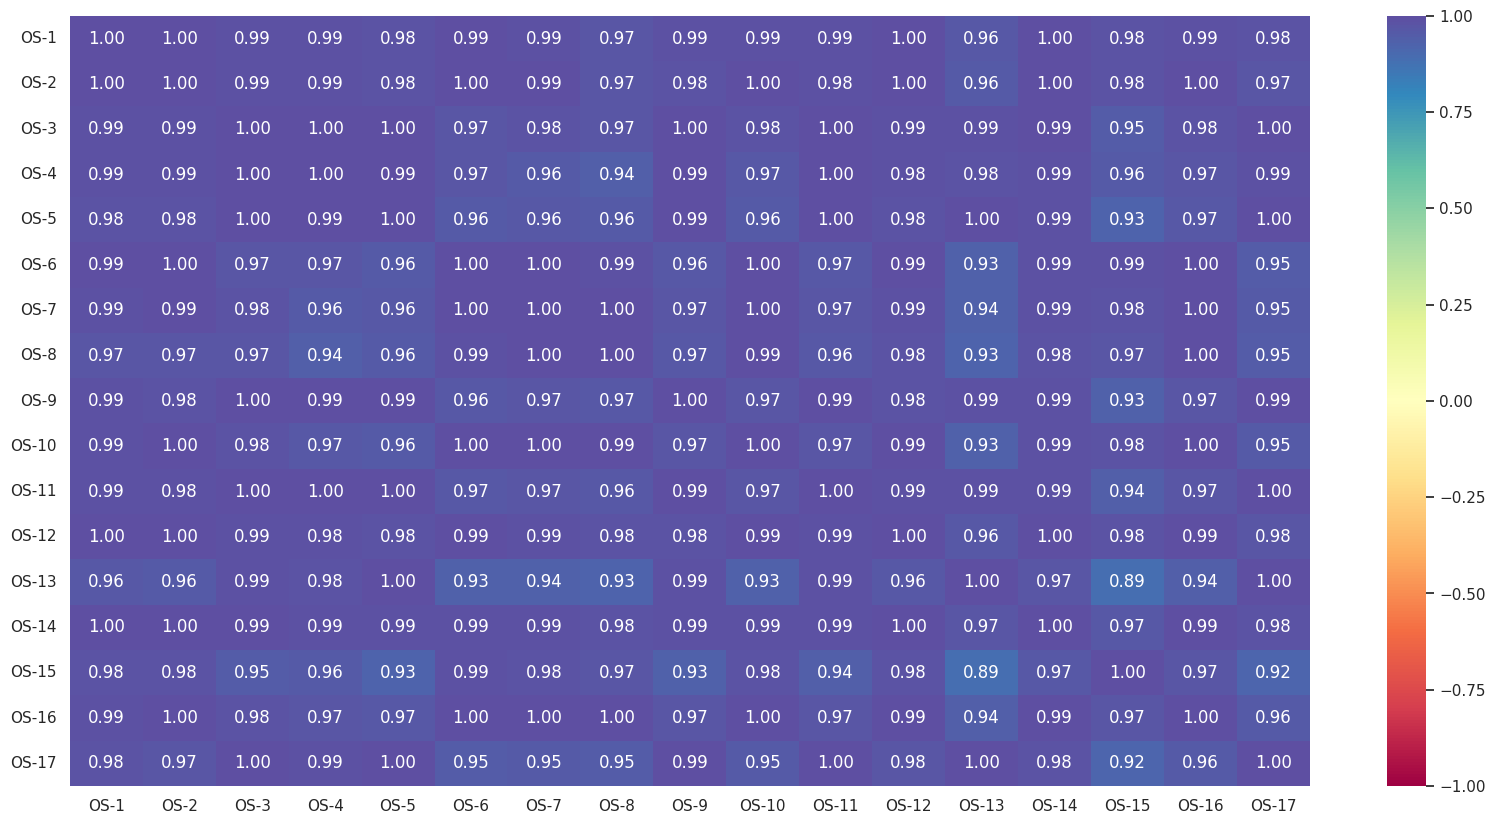

In [70]:
plt.figure(figsize=(20,10))
sns.heatmap(data_sin_indice.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap="Spectral")
plt.show()

In [ ]:
#sns.pairplot(data_sin_indice,hue='OS-1')
#plt.show()

<Axes: >

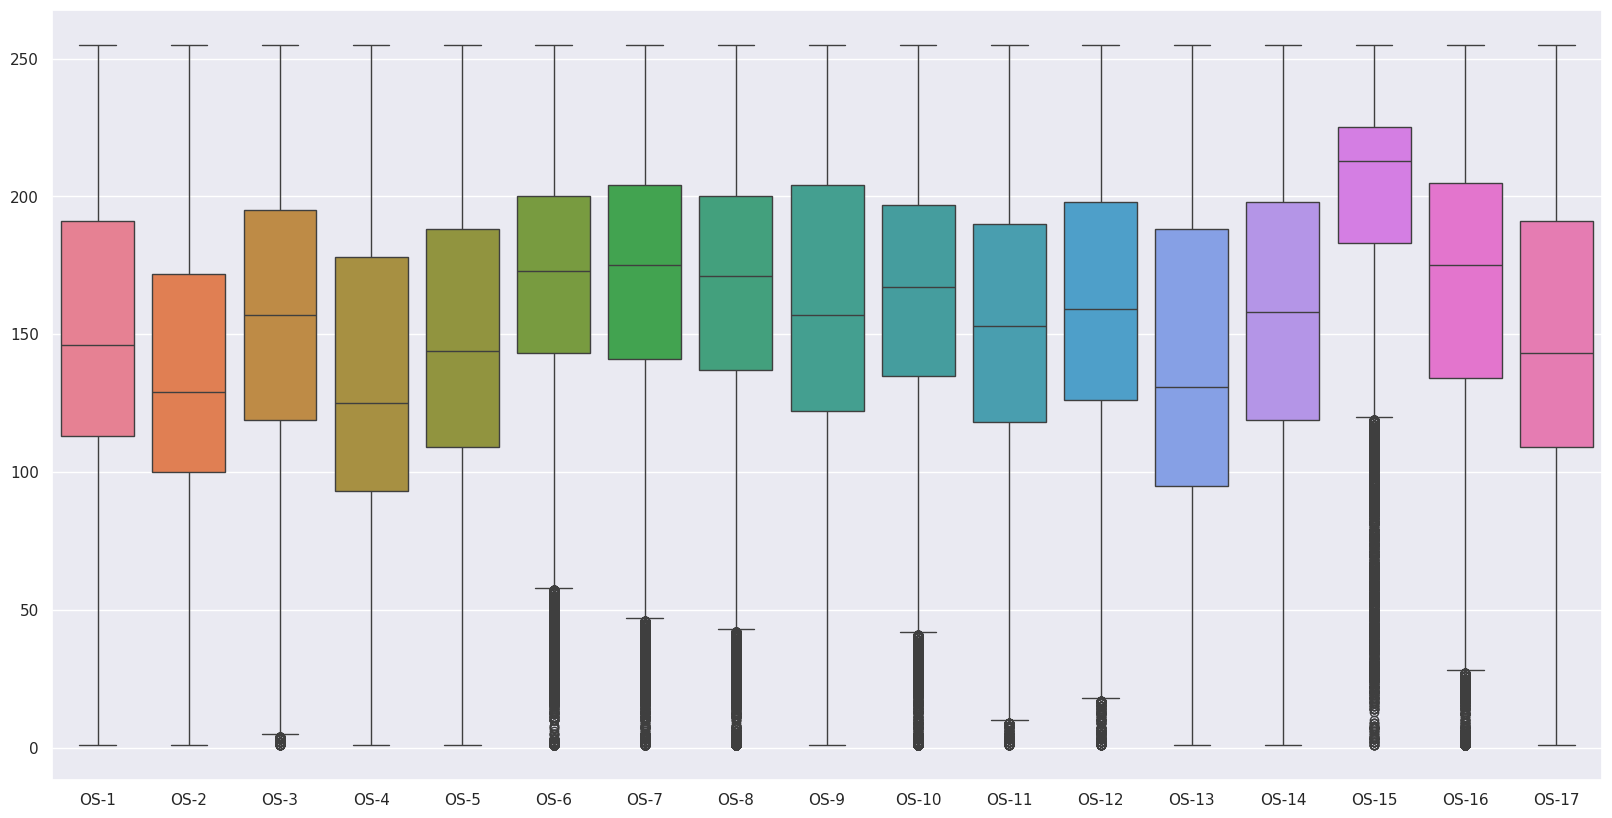

In [71]:
plt.figure(figsize=(20,10))

sns.boxplot(data=data_sin_indice)


<Axes: ylabel='Count'>

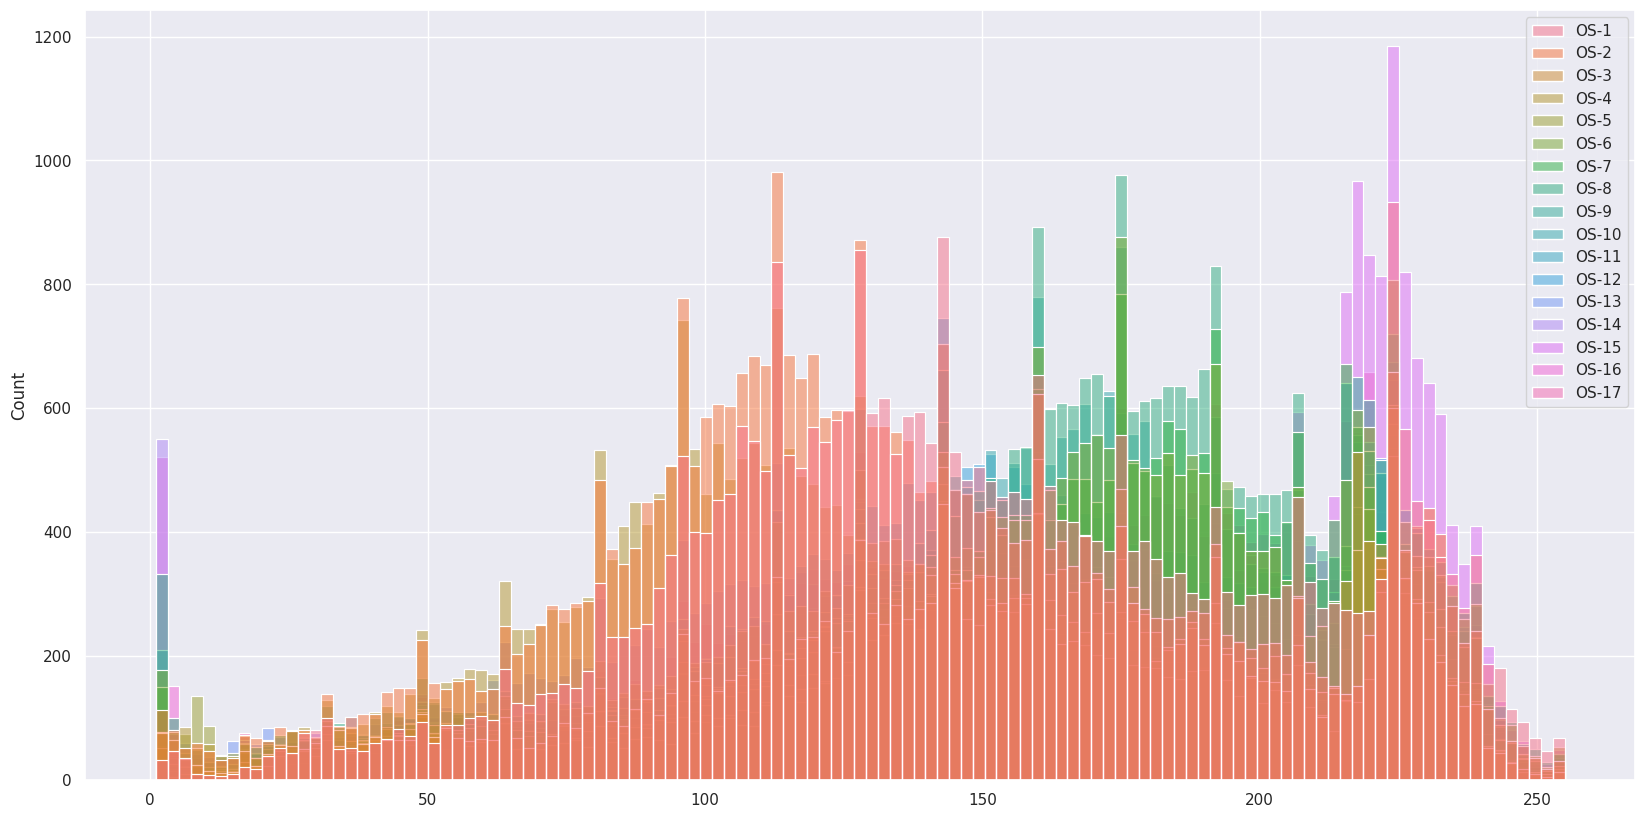

In [72]:
plt.figure(figsize=(20,10))

sns.histplot(data=data_sin_indice)


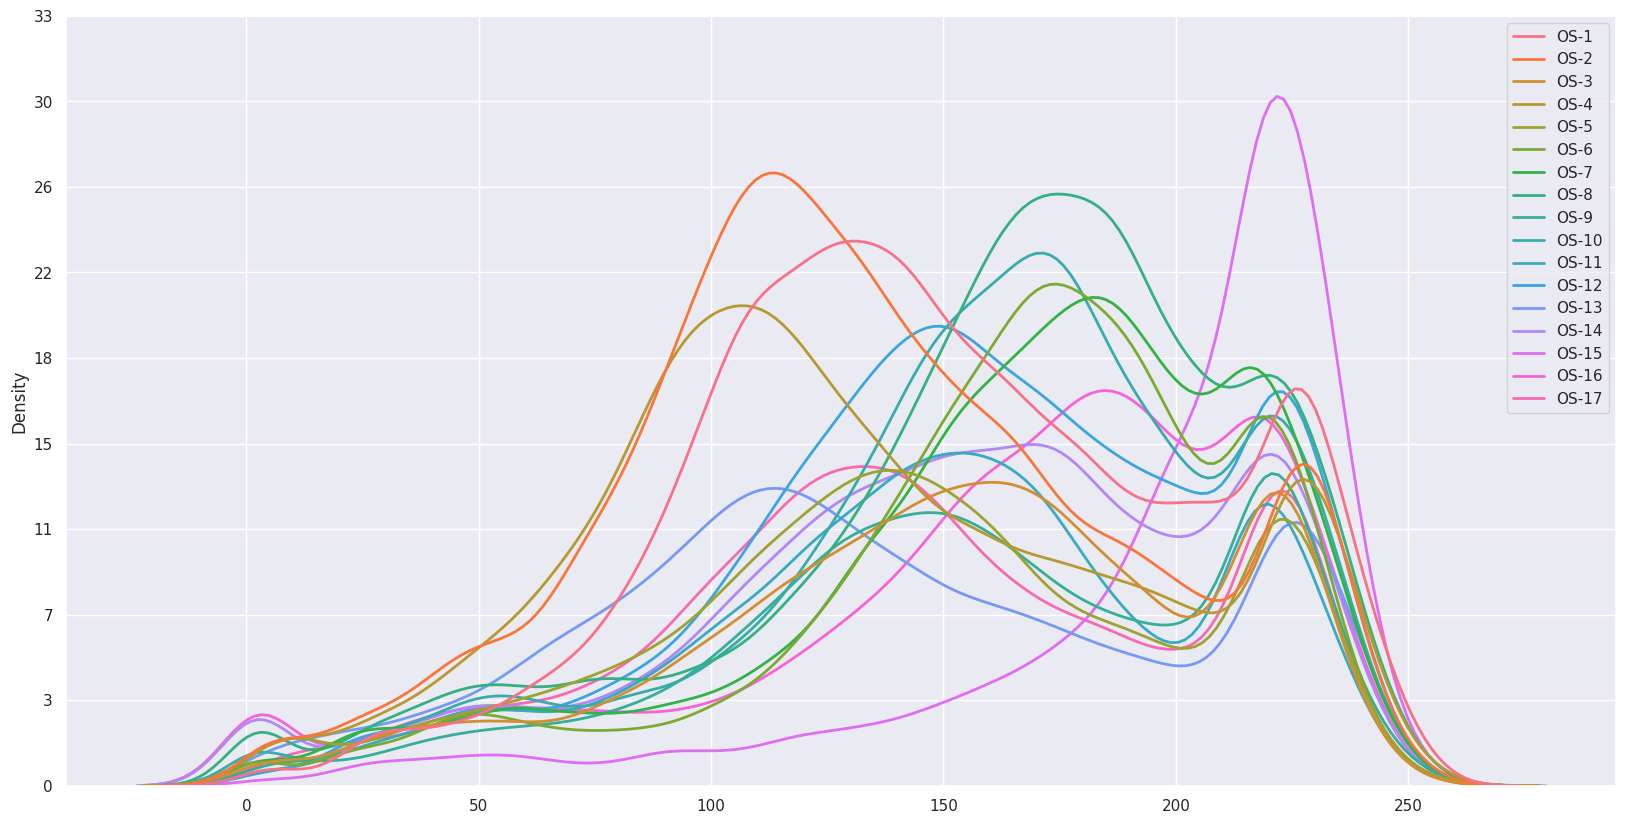

In [73]:
plt.figure(figsize=(20, 10))

sns.kdeplot(data=data_sin_indice, color='orange', linewidth=2)
yticks = plt.yticks()[0]
count_values = [int(value * len(data_sin_indice)) for value in yticks]
plt.yticks(yticks, [str(count) for count in count_values])

plt.ylabel('Count')

plt.show()



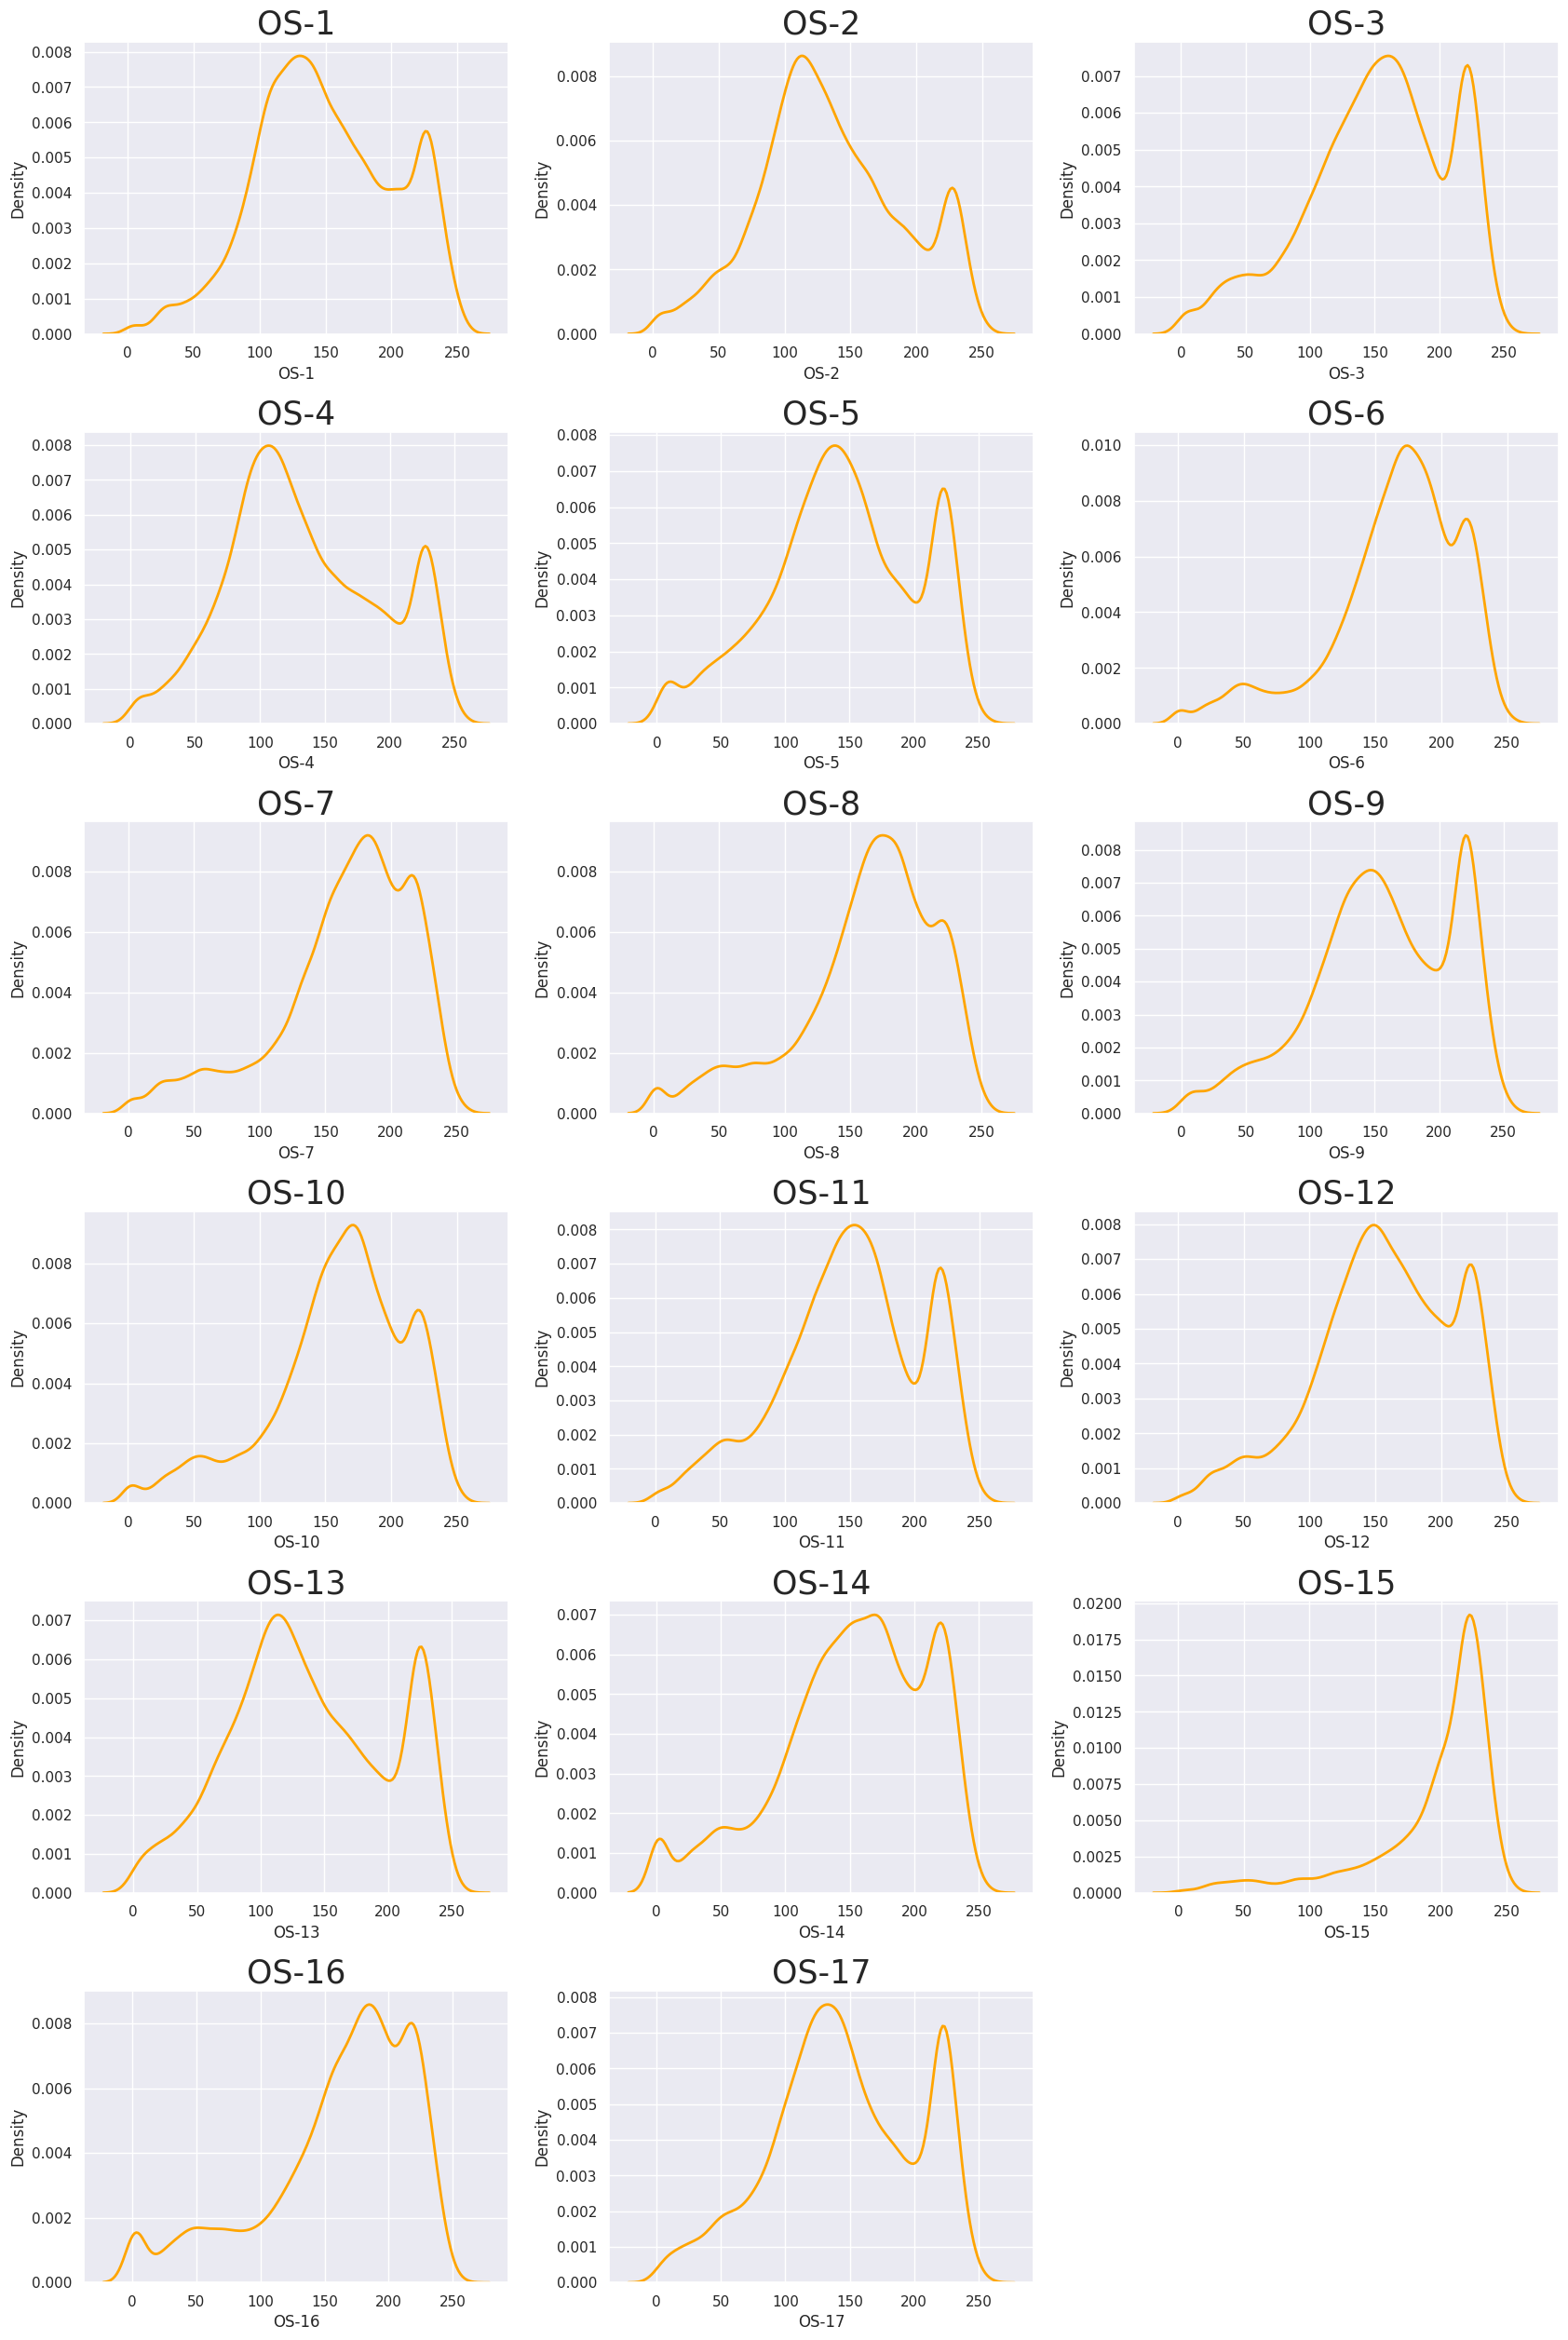

In [74]:
Uni_num = data_sin_indice.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))

for i, column in enumerate(Uni_num):
  plt.subplot(18, 3, i + 1)
  sns.kdeplot(data=data_sin_indice[column], color='orange', linewidth=2)
  plt.title(column, fontsize=25)
  plt.tight_layout()

plt.show()

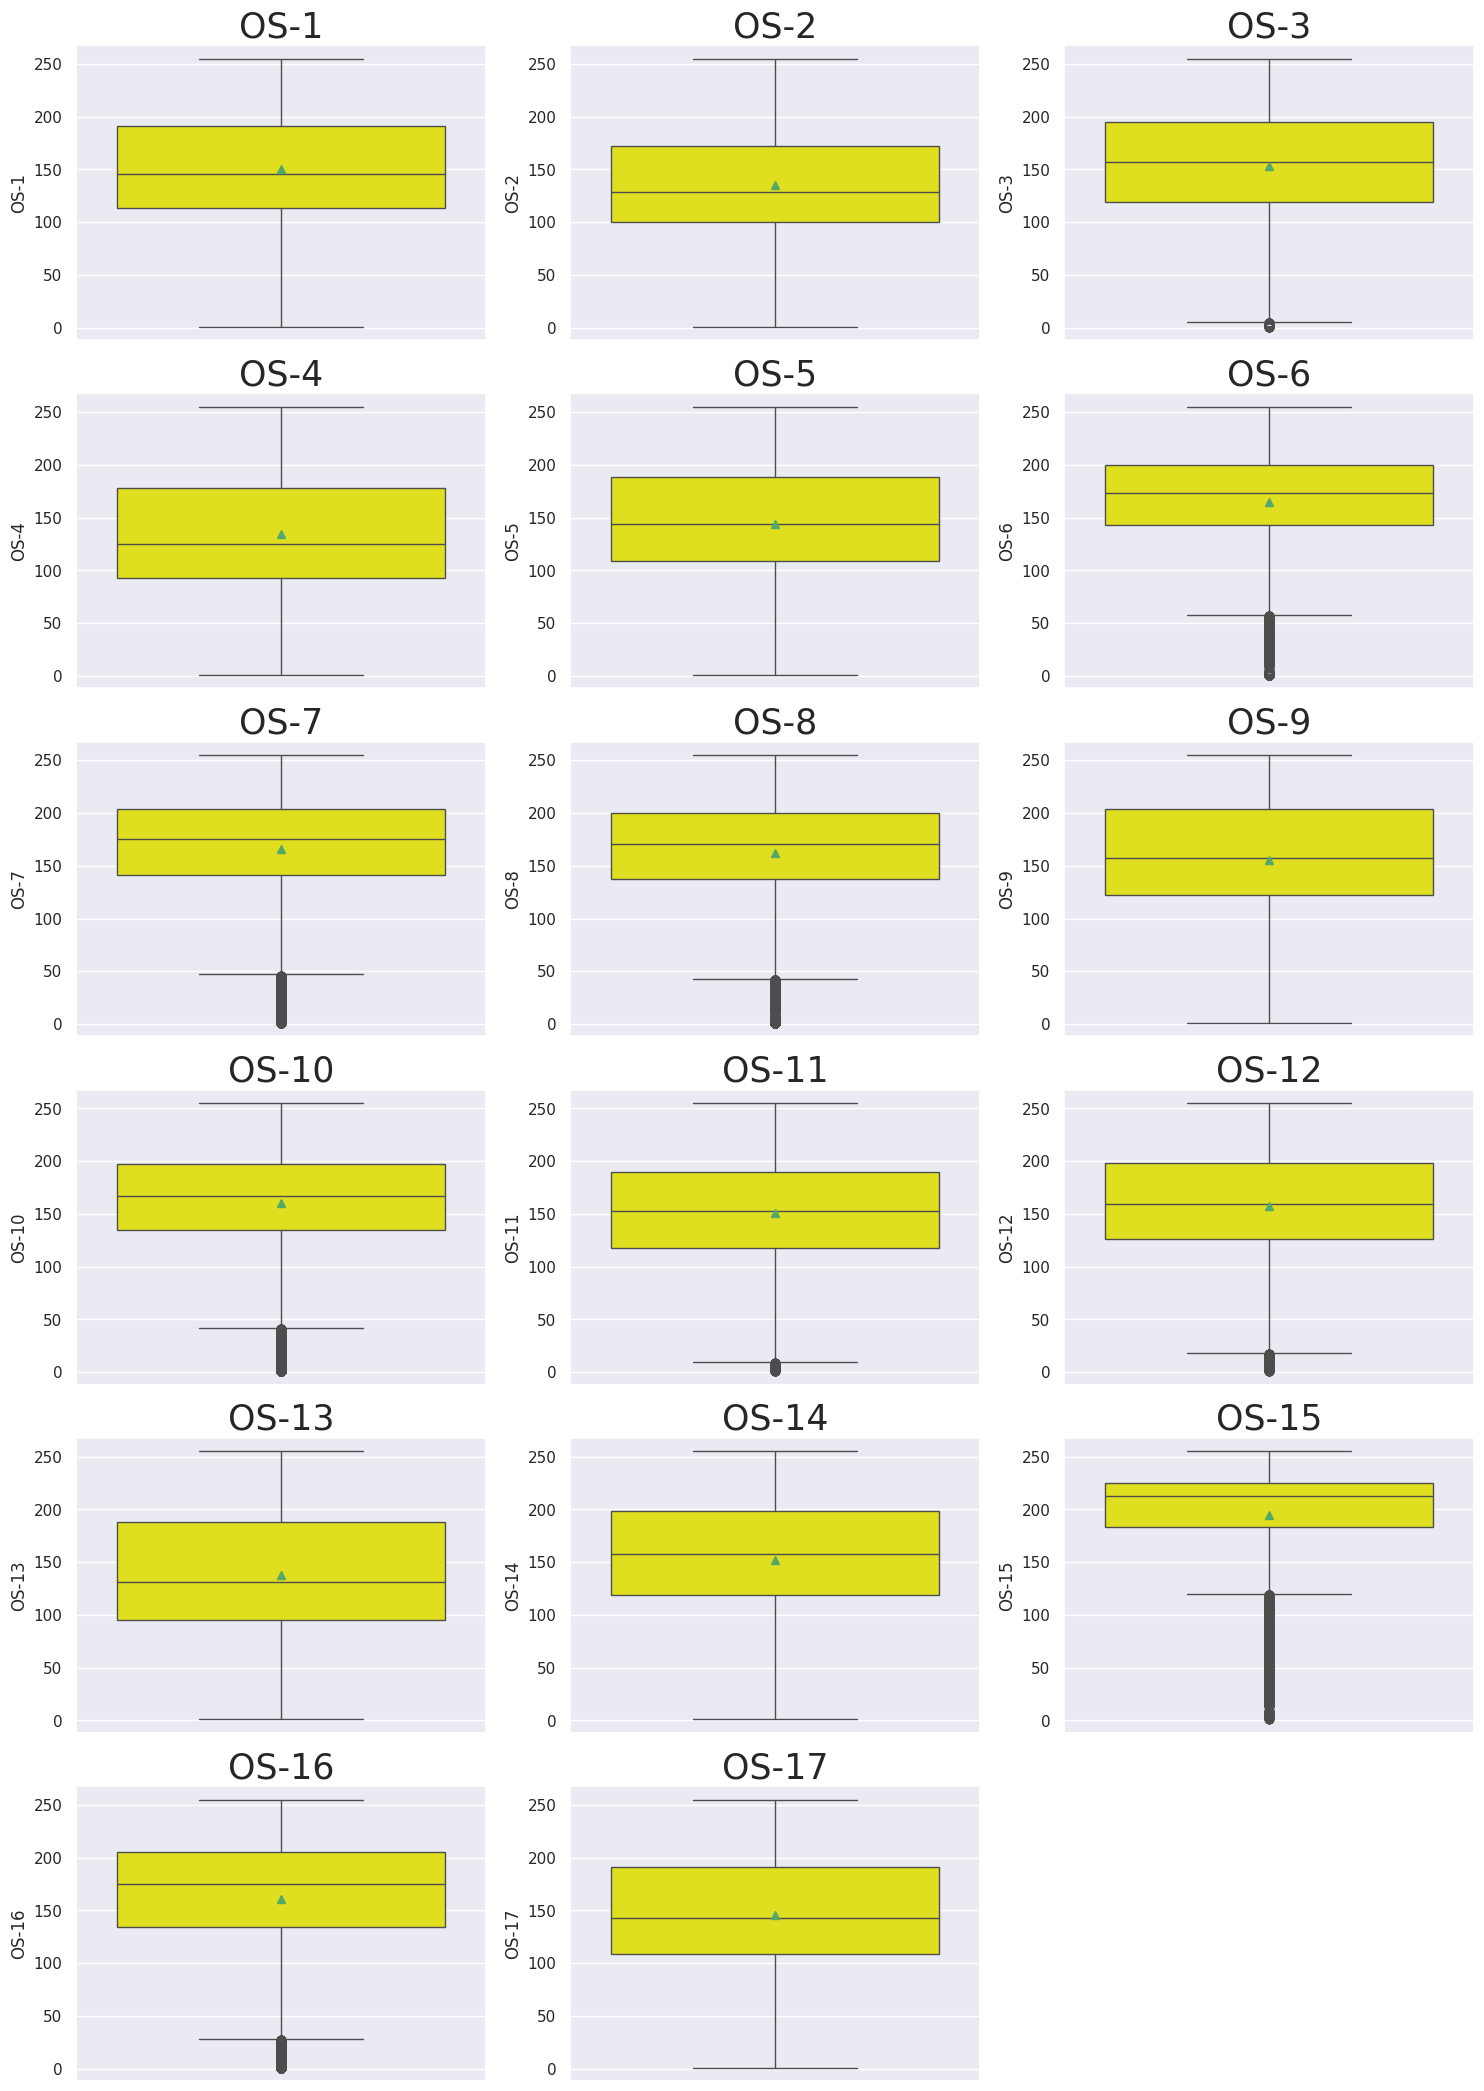

In [75]:
plt.figure(figsize=(15,35))
for i in range(len(Uni_num)):
    plt.subplot(10,3,i+1)
    sns.boxplot(data_sin_indice[Uni_num[i]],showmeans=True, color='yellow')
    plt.tight_layout()
    plt.title(Uni_num[i],fontsize=25)

plt.show()

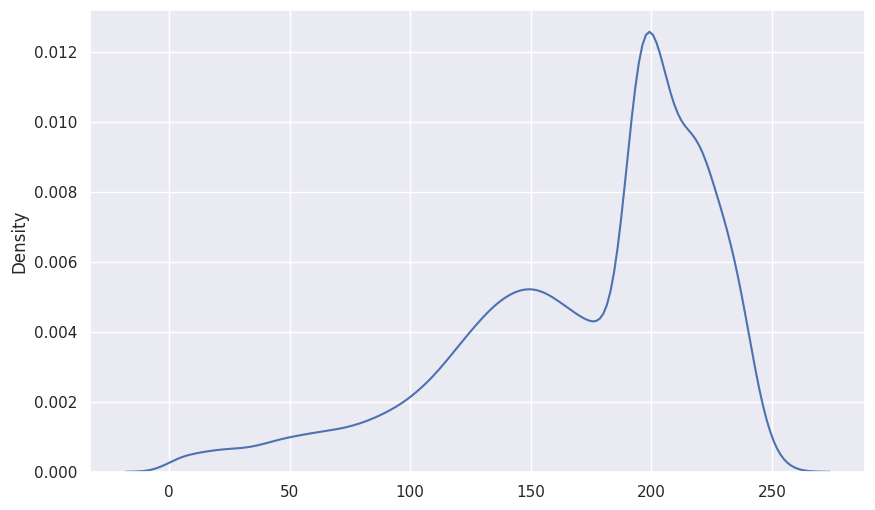

In [76]:
mean_data = np.mean(data_sin_indice, axis=1)

plt.figure(figsize=(10, 6))

sns.kdeplot(data=mean_data, color='blue', linewidth=2)
yticks = plt.yticks()[0]
count_values = [int(value * len(mean_data)) for value in yticks]
plt.yticks(yticks, [str(count) for count in count_values])

plt.ylabel('Count')

plt.show()